# 1 . Authenticate to Twitter

In [1]:
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%store -r bearer_token
#initialize client
client = tw.Client(bearer_token=bearer_token)

# 2. Get Tweets
- Collect the sentiment(tweets) of each day fro the past seven days at 2400
- Collect the varying sentiment over a day at 4 ifeent times of day

0600,1200,1800,2400

In [3]:
import datetime

# get current time and start time (14 days ago)
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
start_time = yesterday.replace(hour=20,minute=0, second=0, microsecond=0)


# format start time string for Twitter API
start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")


In [37]:

#Create a query
query = '#BTC #bitcoin -is:retweet -eth -ETH -#ETH'


#Send the request through the client method
response = (tw.Paginator(client.search_recent_tweets,query=query,end_time = start_time  ,
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=150))



In [38]:
#Unpack the api response into a dictionary
tweets= [{'Tweets':tweet.text,'Timestamp':tweet.created_at} for tweet in response]

Im trying to make the call 7 times with diferent end time each time
- Trouble unpacking the gen obj

# 3. Preprocess
- Clean the tweets
- Lematize words

Lematize is reducing a word to base form. Walks walking walked get turned to Walk. Making it easier to analyze

In [39]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 20:59:41+00:00
1,#bitcoin #bitcoinnews #bitcointalk #btc On #fa...,2023-05-15 20:59:35+00:00
2,Best in Crypto 💪\n\n@Richquack \n\nNeed more i...,2023-05-15 20:59:23+00:00
3,#XAU #GOLD \n#BTC #Bitcoin \n\nThe weekly loo...,2023-05-15 20:58:56+00:00
4,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 20:58:32+00:00


In [40]:
df.shape

(150, 2)

In [41]:
#import libs
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [42]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = [stopwords.words('english')]
custom_stopwords = ['#','RT','crypto']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\w126311\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\w126311\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\w126311\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [43]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Processed Tweet
0,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 20:59:41+00:00,HI I'm an AI bot I will show my result for inf...
1,#bitcoin #bitcoinnews #bitcointalk #btc On #fa...,2023-05-15 20:59:35+00:00,#bitcoin #bitcoinnews #bitcointalk #btc On #fa...
2,Best in Crypto 💪\n\n@Richquack \n\nNeed more i...,2023-05-15 20:59:23+00:00,Best in Crypto 💪 @Richquack Need more informat...
3,#XAU #GOLD \n#BTC #Bitcoin \n\nThe weekly loo...,2023-05-15 20:58:56+00:00,#XAU #GOLD #BTC #Bitcoin The weekly looking li...
4,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 20:58:32+00:00,HI I'm an AI bot I will show my result for inf...


# 4. Calculate Sentiment
- Get Polarity and Subjectivity

**Polarity** : Negative or Positive

**Subjectivity**: How much based on emotion is the tweet

In [44]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [45]:
df.head()

,Tweets,Timestamp,Processed Tweet,polarity,subjectivity
0,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 20:59:41+00:00,HI I'm an AI bot I will show my result for inf...,0.00,0.0
1,#bitcoin #bitcoinnews #bitcointalk #btc On #fa...,2023-05-15 20:59:35+00:00,#bitcoin #bitcoinnews #bitcointalk #btc On #fa...,0.50,0.5
2,Best in Crypto 💪\n\n@Richquack \n\nNeed more i...,2023-05-15 20:59:23+00:00,Best in Crypto 💪 @Richquack Need more informat...,0.75,0.4
3,#XAU #GOLD \n#BTC #Bitcoin \n\nThe weekly loo...,2023-05-15 20:58:56+00:00,#XAU #GOLD #BTC #Bitcoin The weekly looking li...,0.00,0.0
4,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 20:58:32+00:00,HI I'm an AI bot I will show my result for inf...,0.00,0.0


In [46]:
df.shape

(150, 5)

In [47]:
df.describe()

,polarity,subjectivity
count,150.000000,150.000000
mean,0.059790,0.181155
std,0.158499,0.239682
min,-0.500000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.075000,0.400000
max,0.750000,1.000000


# 5. Vizualize

In [48]:
#make a moving average for sentiment

btc = df[['Timestamp', 'polarity']]
btc = btc.sort_values(by='Timestamp', ascending=True)
btc['MA Polarity'] = btc.polarity.rolling(10, min_periods=3).mean()

In [49]:
btc.head()

,Timestamp,polarity,MA Polarity
149,2023-05-15 20:19:21+00:00,0.0,NaN
148,2023-05-15 20:19:26+00:00,0.0,NaN
147,2023-05-15 20:19:29+00:00,0.0,0.0
146,2023-05-15 20:19:38+00:00,0.0,0.0
145,2023-05-15 20:20:04+00:00,0.0,0.0


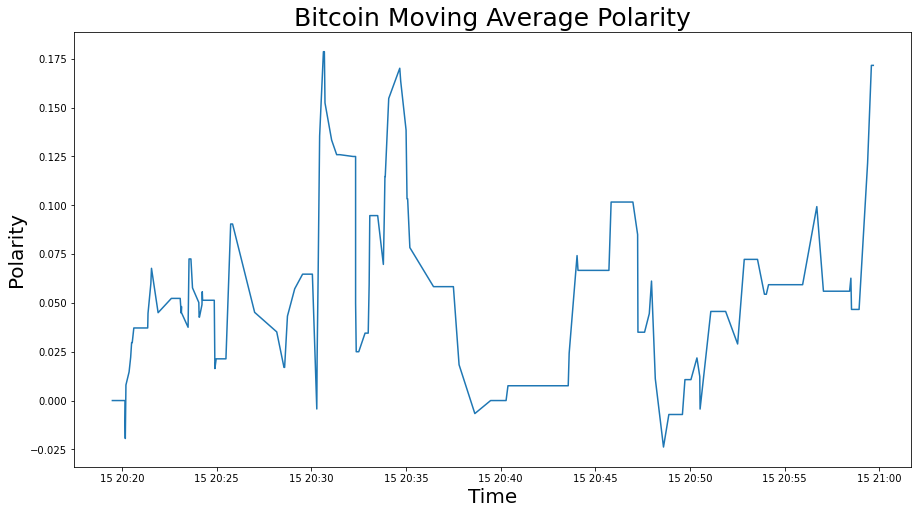

In [50]:
#plot the MA polarity
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(btc['Timestamp'],btc['MA Polarity'])
ax.set_title('Bitcoin Moving Average Polarity',fontsize = 25);
ax.set_ylabel('Polarity',fontsize = 20);
ax.set_xlabel('Time',fontsize = 20);

# 6. Compare With BTC price
- Collect BTC price data
- Make sure the data is from the same time period as the tweets

In [51]:
#Get the tweets time range
start_range = df['Timestamp'].iloc[-1].round('min')
end_range = df['Timestamp'][0].round('min')

# Format the timestamp
formatted_start_range = start_range.strftime("%Y-%m-%d %H:%M:%S")
formatted_end_range = end_range.strftime("%Y-%m-%d %H:%M:%S")

#Set the API hours variable based on the tweets end_range
API_hours = end_range.round('H').hour+1

In [52]:
#Get the price data from API

import requests
import time

#get data from api

url = 'https://min-api.cryptocompare.com/data/v2/histominute'

start_time = yesterday.replace(hour=API_hours,minute=0, second=0, microsecond=0)

# set the parameters for the API request
params = {
    'fsym': 'BTC',
    'tsym': 'USD',
    'limit': 1400,  # number of minutes to retrieve
    'aggregate': 1,  # granularity of the data (1 = 1 minute)
    'toTs': int(time.mktime(start_time.timetuple()))
}

response = requests.get(url, params=params)
data = response.json()['Data']['Data']
df_price = pd.DataFrame(data = data)


df_price['time'] = pd.to_datetime(df_price['time'], unit='s')


In [53]:
#get the index in the price df of values we want
start_of_tweets = df_price['time'][df_price['time'] == formatted_start_range].index.item()
end_of_tweets = df_price['time'][df_price['time'] == formatted_end_range].index.item()


In [54]:
#Get a slice of the price df corresponding to the tweets time range
df_slice = df_price.iloc[start_of_tweets:end_of_tweets]
df_slice.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
1359,2023-05-15 20:19:00,27383.91,27358.85,27383.91,29.920,818957.75,27360.02,direct,
1360,2023-05-15 20:20:00,27362.73,27347.99,27360.02,27.290,746393.20,27359.74,direct,
1361,2023-05-15 20:21:00,27382.17,27359.74,27359.74,7.534,206266.67,27381.90,direct,
1362,2023-05-15 20:22:00,27381.90,27372.89,27381.90,9.397,257234.66,27372.92,direct,
1363,2023-05-15 20:23:00,27387.68,27369.88,27372.92,17.810,487619.37,27382.12,direct,


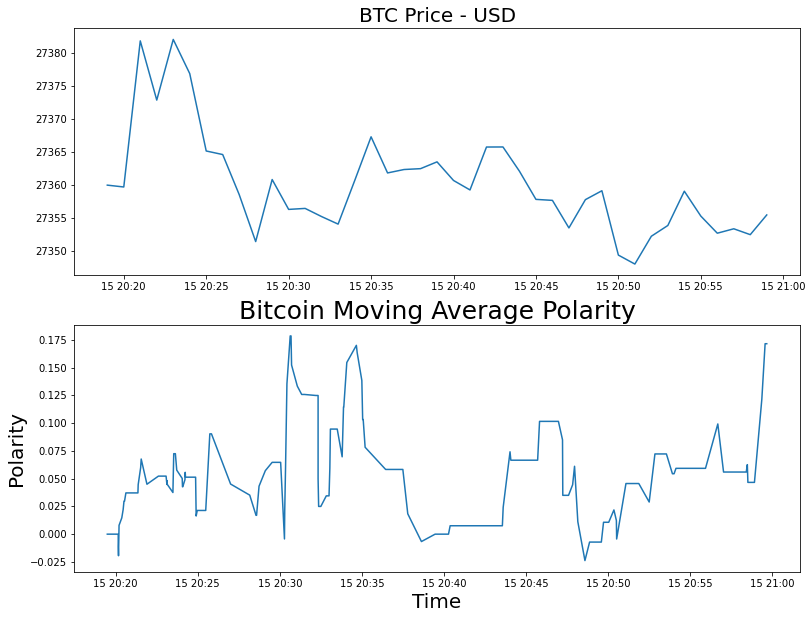

In [55]:
#Plot graph of 

fig,ax = plt.subplots(2,1,figsize=(13,10))

#plot price
ax[0].plot(df_slice['time'],df_slice['close']);
ax[0].set_title('BTC Price - USD',fontsize=20);

#plot sentiment
ax[1].plot(btc['Timestamp'],btc['MA Polarity'])
ax[1].set_title('Bitcoin Moving Average Polarity',fontsize = 25);
ax[1].set_ylabel('Polarity',fontsize = 20);
ax[1].set_xlabel('Time',fontsize = 20);